In [ ]:
import tensorflow as tf


In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from keras.models import Model

In [6]:
from keras.layers import Dense, GlobalAveragePooling2D

In [7]:
train_dir = 'datasetX/trainX'
valid_dir = 'datasetX/validX'
# test_dir = 'JupyterLab_codes/dataset/EMP_Dataset/testX'

In [8]:
from PIL import Image
import os

In [9]:
# pip install scipy

In [10]:
import scipy.integrate

import scipy.special

In [11]:
import scipy

In [13]:
# Define image dimensions and batch size
image_size = (299, 299)
batch_size = 32

In [14]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 13626 images belonging to 56 classes.
Found 1667 images belonging to 56 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

### Using pre-trained **VGG16** model

In [16]:
from tensorflow.keras.applications import VGG16

In [17]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [18]:
# Load pre-trained VGG16 model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

2024-01-17 00:26:42.646345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22279 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:18:00.0, compute capability: 8.6
2024-01-17 00:26:42.647100: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 1378 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-01-17 00:26:42.647587: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 398 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-01-17 00:26:42.648097: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 1380 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090, pc

In [19]:
num_classes=56

In [20]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(299, activation='relu')(x)
# x = Dropout(0.5)(x)  # Add dropout layer
predictions = Dense(num_classes, activation='softmax')(x)

In [21]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [22]:
# Freeze base model layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [23]:
from tensorflow.keras.metrics import Precision, Recall

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

In [25]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=40,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/40


2024-01-17 00:26:56.628736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2024-01-17 00:26:58.082848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


425/425 [==============================] - 211s 483ms/step - loss: 3.9243 - accuracy: 0.0386 - precision: 0.3889 - recall: 5.1493e-04 - val_loss: 3.7345 - val_accuracy: 0.0643 - val_precision: 0.2857 - val_recall: 0.0012
Epoch 2/40
425/425 [==============================] - 202s 474ms/step - loss: 3.3666 - accuracy: 0.1238 - precision: 0.5726 - recall: 0.0264 - val_loss: 2.8439 - val_accuracy: 0.2290 - val_precision: 0.6738 - val_recall: 0.0757
Epoch 3/40
425/425 [==============================] - 201s 472ms/step - loss: 2.4216 - accuracy: 0.3406 - precision: 0.6894 - recall: 0.1557 - val_loss: 2.0661 - val_accuracy: 0.4435 - val_precision: 0.7220 - val_recall: 0.2825
Epoch 4/40
425/425 [==============================] - 203s 477ms/step - loss: 1.7219 - accuracy: 0.5185 - precision: 0.7689 - recall: 0.3470 - val_loss: 1.5958 - val_accuracy: 0.5577 - val_precision: 0.7849 - val_recall: 0.4363
Epoch 5/40
425/425 [==============================] - 203s 477ms/step - loss: 1.3591 - accuracy

In [26]:
test_dir = 'datasetX/testX'

In [34]:
# Data augmentation and preprocessing for the test set

test_datagen = ImageDataGenerator(
      rescale=1./255
      rotation_range=10,
      horizontal_flip=True,
      zoom_range=0.2,
      shear_range=0.2,
      width_shift_range=0.1,
      height_shift_range=0.1

)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode= 'categorical'
)

Found 1738 images belonging to 56 classes.


In [60]:
#VGG16
scores = model.evaluate(test_generator)

55/55 [==============================] - 34s 619ms/step - loss: 1.1382 - accuracy: 0.6962


In [35]:
#VGG16 new
scores = model.evaluate(test_generator)

55/55 [==============================] - 5s 84ms/step - loss: 1.4961 - accuracy: 0.8165 - precision: 0.8356 - recall: 0.8072


In [36]:
scores

[1.496052622795105, 0.8164557218551636, 0.835616409778595, 0.8072497248649597]

In [37]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 425}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

pre = history.history['precision']
val_pre = history.history['val_precision']

rec = history.history['recall']
val_rec = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

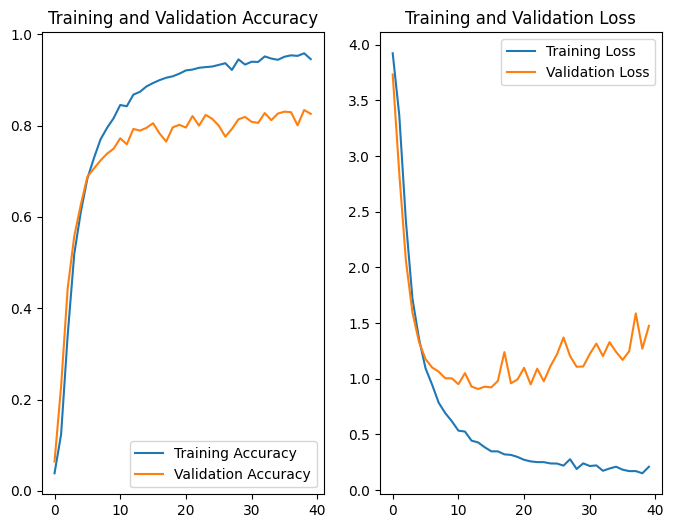

In [41]:
import matplotlib.pyplot as plt

EPOCHS = 40

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

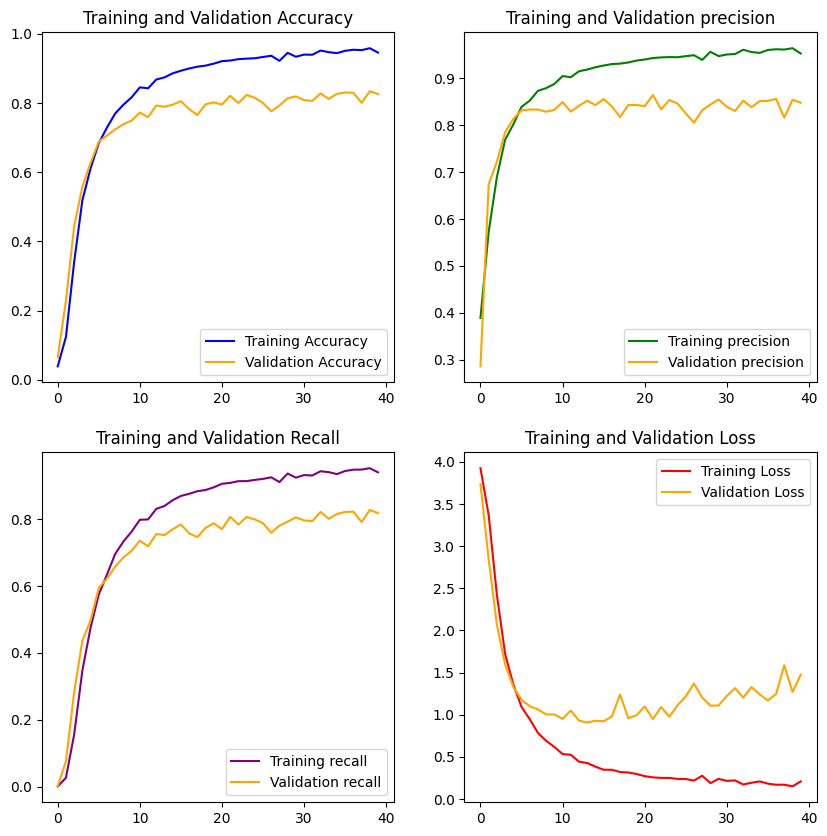

In [45]:
import matplotlib.pyplot as plt

EPOCHS = 40

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='blue')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(EPOCHS), pre, label='Training precision', color='green')
plt.plot(range(EPOCHS), val_pre, label='Validation precision', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation precision')

plt.subplot(2, 2, 3)
plt.plot(range(EPOCHS), rec, label='Training recall', color='purple')
plt.plot(range(EPOCHS), val_rec, label='Validation recall', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

plt.subplot(2, 2, 4)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='red')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='orange')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual label: Xanthium strumarium
1/1 [==============================] - 0s 53ms/step
Predicted label: Xanthium strumarium


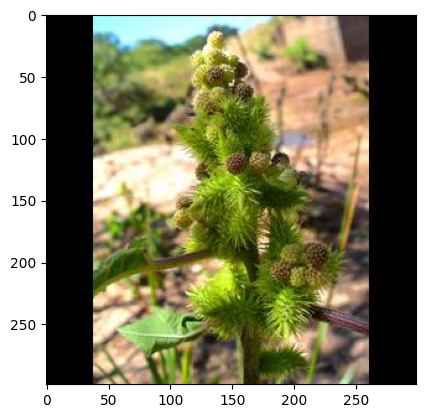

In [47]:
import numpy as np

for images_batch, labels_batch in test_generator:
   
    first_image = images_batch[0]
    first_label = np.argmax(labels_batch[0])  # Use np.argmax to get the class index

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])

    batch_predictions = model.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_predictions[0])]  # Use np.argmax for categorical class mode
    print("Predicted label:", predicted_label)

    break

1/1 [==============================] - 0s 22ms/step


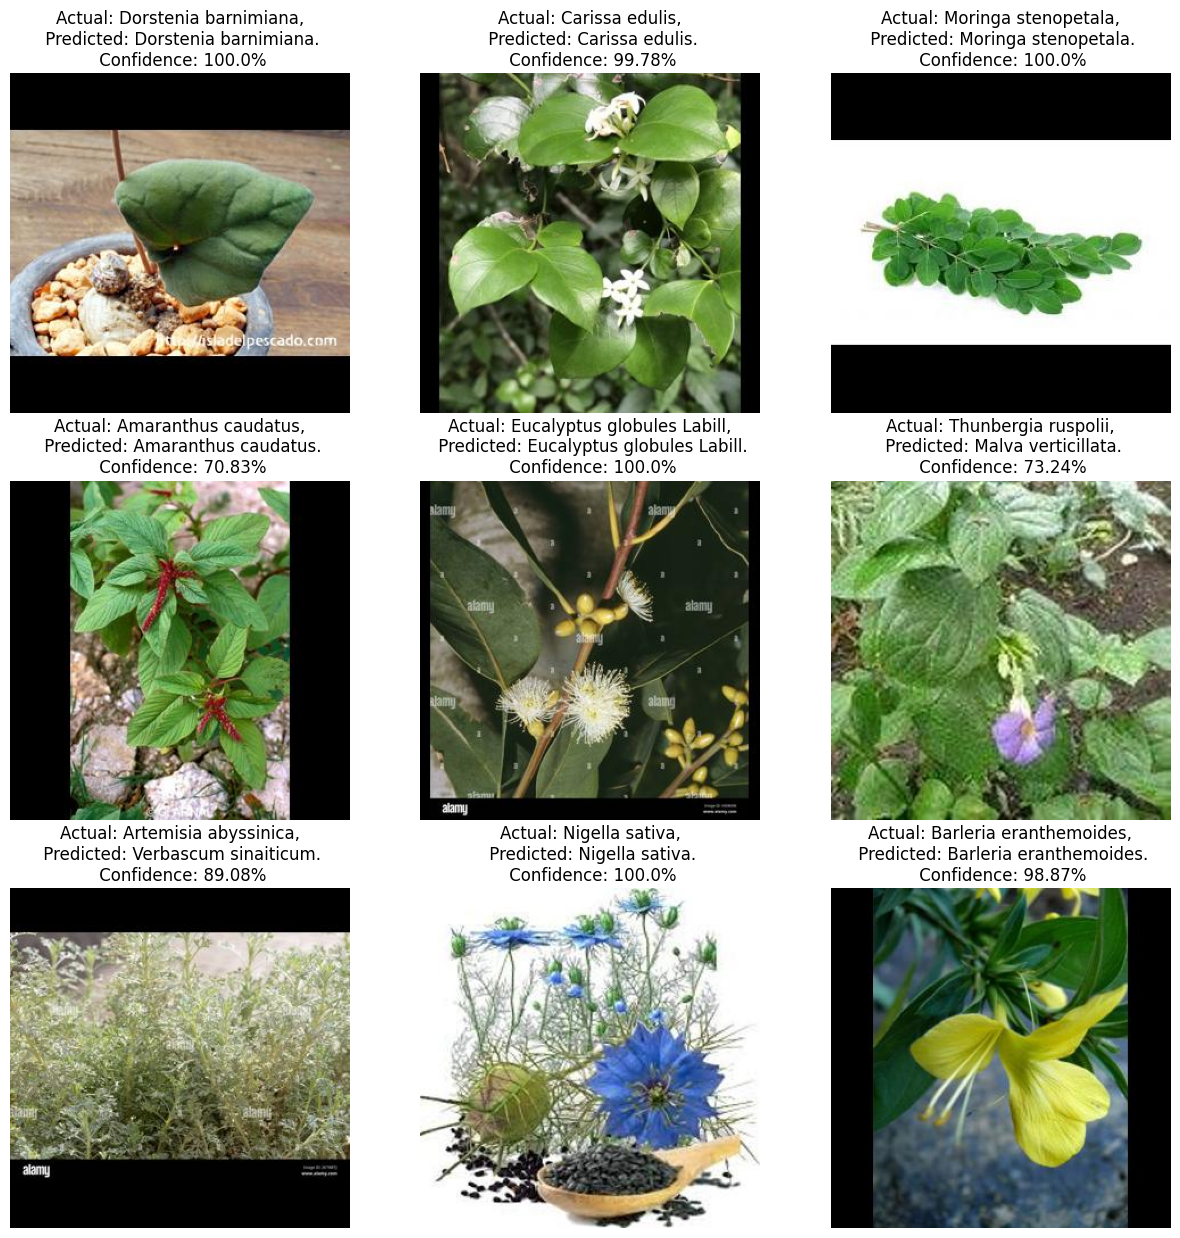

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

1/1 [==============================] - 0s 24ms/step


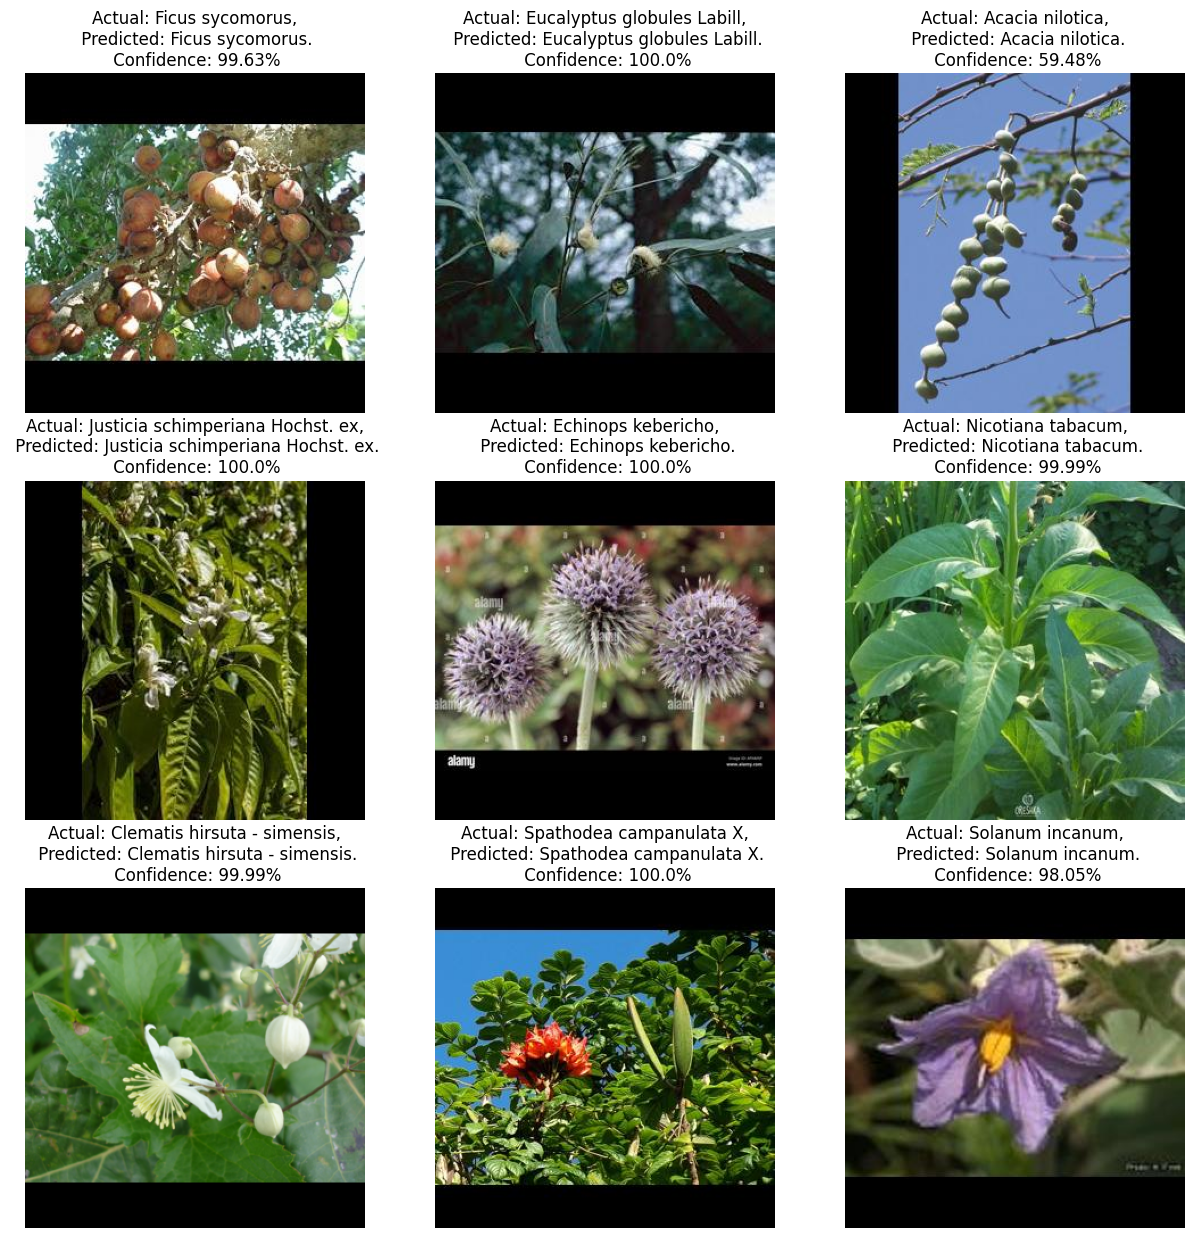

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

1/1 [==============================] - 0s 22ms/step


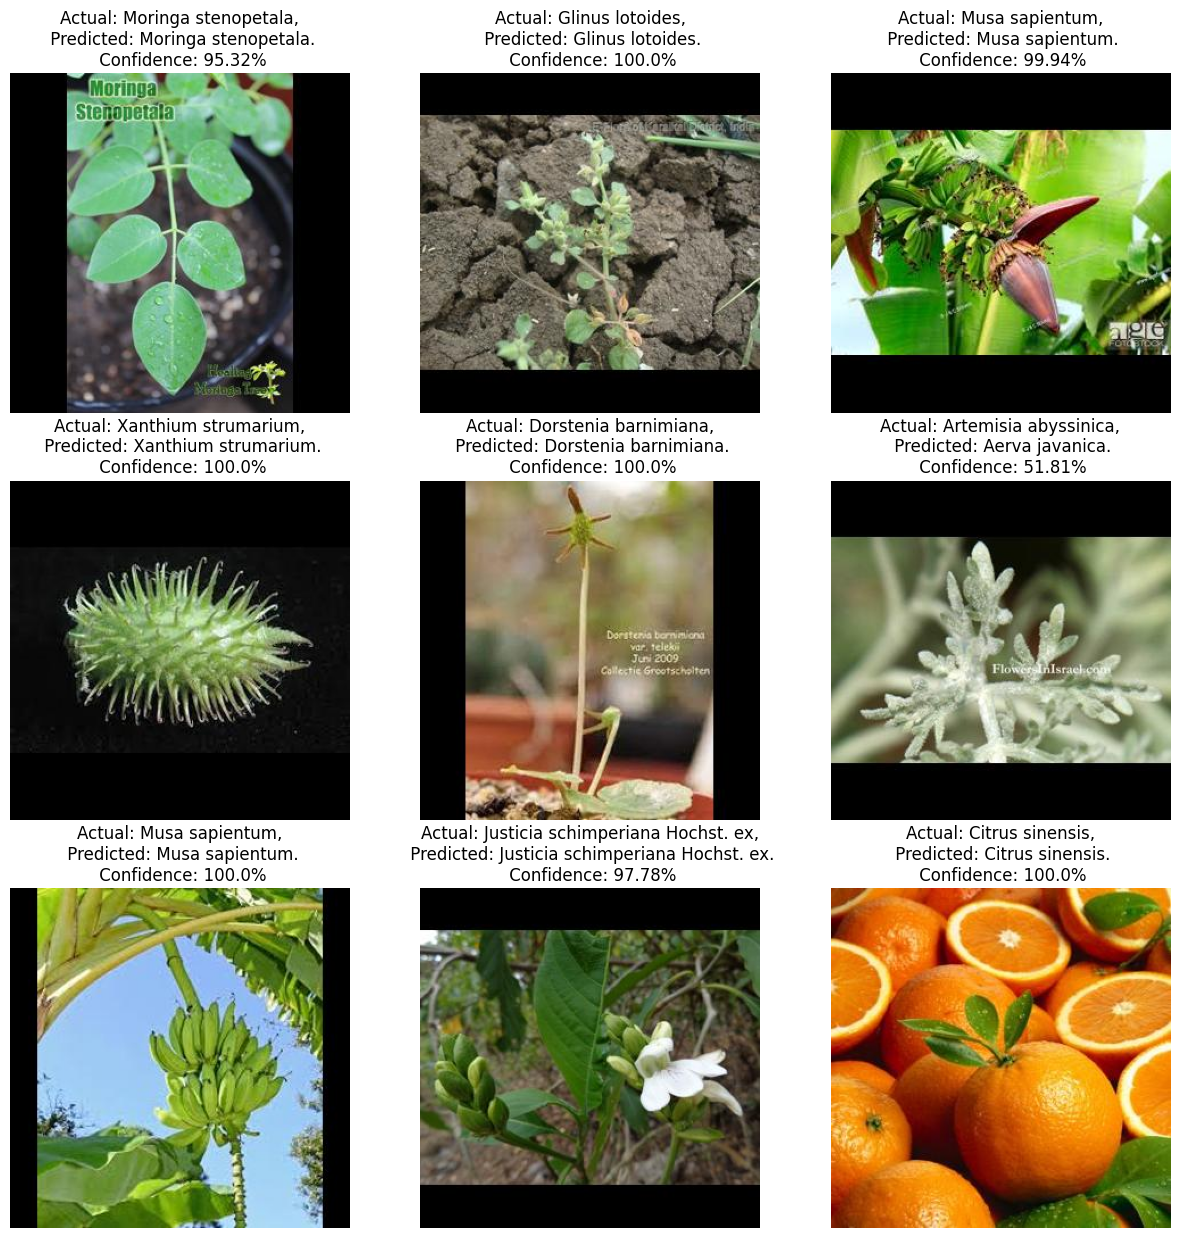

In [56]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [61]:
model.save("saved_models/TrainedModel2_VGG16X.h5")

In [62]:
model.save("saved_models/TrainedModel2_VGG16X.keras")

In [63]:
pip list

Package                      Version
---------------------------- --------------------
absl-py                      2.0.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.2
bleach                       6.1.0
boltons                      23.0.0
brotlipy                     0.7.0
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.15.1
chardet                      4.0.0
charset-normalizer           2.0.4
chex                         0.1.85
comm                         0.2.1
conda                        23.3.1
conda-content-trust          0.1.3
conda-package-handling       2.0.2
conda_package_streaming      0.7.0
contourpy                

In [64]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("saved_models/TrainedModel2_VGG16X.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpi1tdhz_3/assets


INFO:tensorflow:Assets written to: /tmp/tmpi1tdhz_3/assets
2024-01-17 03:34:26.464391: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-01-17 03:34:26.464433: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-01-17 03:34:26.487001: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-01-17 03:34:26.650718: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmpi1tdhz_3
2024-01-17 03:34:26.671692: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 205974 microseconds.
